In [ ]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
np.random.seed(0)

In [ ]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs/src/master/

fatal: destination path 'master' already exists and is not an empty directory.


In [ ]:
!ls master

signnames.csv  test.p  train.p	valid.p


In [ ]:
df = pd.read_csv("master/signnames.csv")
df.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [ ]:
with open("master/train.p","rb") as f :
    train_data = pickle.load(f)

with open("master/valid.p","rb") as f :
    val_data = pickle.load(f)

with open("master/test.p","rb") as f :
    test_data = pickle.load(f)

f.closed

True

In [ ]:
print(type(train_data))
print(type(val_data))
print(type(test_data))

<class 'dict'>
<class 'dict'>
<class 'dict'>


In [ ]:
train_data.keys(),val_data.keys(),test_data.keys()

(dict_keys(['coords', 'labels', 'features', 'sizes']),
 dict_keys(['coords', 'labels', 'features', 'sizes']),
 dict_keys(['sizes', 'coords', 'features', 'labels']))

In [ ]:
X_train, y_train = train_data["features"], train_data["labels"]
X_val ,y_val = val_data["features"], val_data["labels"]
X_test, y_test = test_data["features"], test_data["labels"]


In [ ]:
X_train.shape, X_val.shape, X_test.shape,y_train.shape,y_val.shape,X_test.shape

((34799, 32, 32, 3),
 (4410, 32, 32, 3),
 (12630, 32, 32, 3),
 (34799,),
 (4410,),
 (12630, 32, 32, 3))

In [ ]:
assert(X_train.shape[0] == y_train.shape[0]), "The Number of Images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The Number of Images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The Number of Images is not equal to the number of labels"

assert(X_train.shape[1:] == (32,32,3)) , "The Dimension of the images are not 32x32x3"
assert(X_val.shape[1:] == (32,32,3)) , "The Dimension of the images are not 32x32x3"
assert(X_test.shape[1:] == (32,32,3)) , "The Dimension of the images are not 32x32x3"

In [ ]:
df.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [ ]:
df["ClassId"].nunique(),df["SignName"].nunique()

(43, 43)

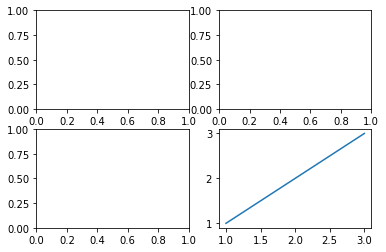

In [ ]:
fig , axes = plt.subplots(2,2)

# ilk olan rows, ikinci olan cols !!! 
# Sadece tekrar için gösterdim !!

axes[1][1].plot(np.array([1,2,3]),np.array([1,2,3]))

In [ ]:
for i,j in enumerate(df.iterrows()):
    if i == 0:
        print(j[0])
        print()
        print(j[1][0])
        print()
        print(j[1][1])
        print()
        print(j)
        break

0

0

Speed limit (20km/h)

(0, ClassId                        0
SignName    Speed limit (20km/h)
Name: 0, dtype: object)


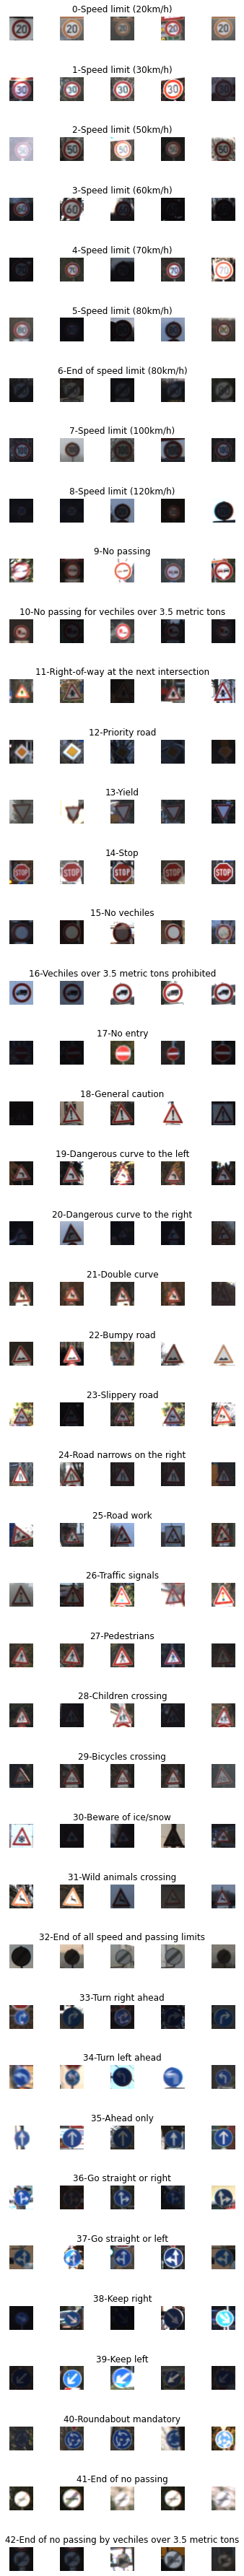

In [ ]:
num_of_samples = []

cols = 5
num_classes = 43

fig , axes = plt.subplots(nrows = num_classes ,ncols = 5 ,figsize = (5,50))
fig.tight_layout()

for i in range(cols):

    for j,rows in df.iterrows():

        x_selected = X_train[y_train == j]
        random = np.random.randint(0,len(x_selected) - 1)
        axes[j][i].imshow(x_selected[random, :,:],cmap = plt.get_cmap("gray"))
        axes[j][i].axis("off")

        if i == 2:

            axes[j][i].set_title(str(j) + "-" + rows["SignName"])
            num_of_samples.append(len(x_selected))

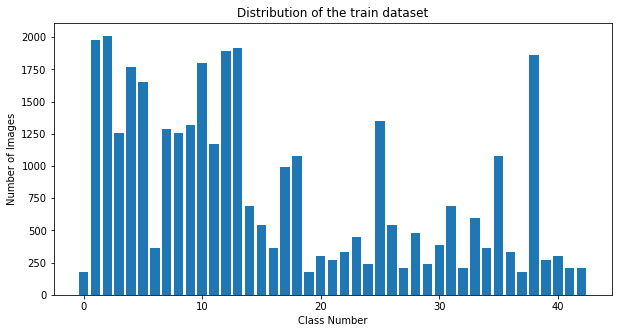

In [ ]:
plt.figure(figsize = (10,5))
plt.bar(range(num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

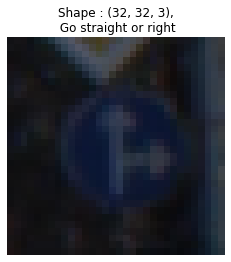

In [ ]:
i = 1000
name = df[df["ClassId"] == y_train[i]]["SignName"].values[0]
plt.imshow(X_train[i])
plt.title(f"Shape : {X_train[i].shape},\n {name}")
plt.axis("off")
plt.show()

In [ ]:
def grayscale(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return gray

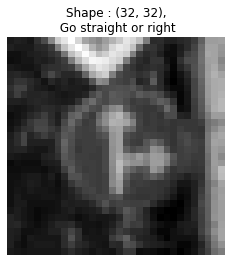

In [ ]:
i = 1000
img = grayscale(X_train[i])
name = df[df["ClassId"] == y_train[i]]["SignName"].values[0]

plt.imshow(img,cmap = "gray")
plt.title(f"Shape : {img.shape},\n {name}")
plt.axis("off")
plt.show()

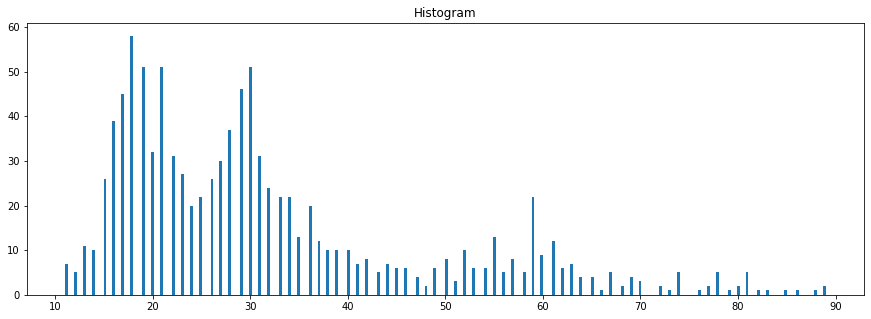

In [ ]:
plt.figure(figsize = (15,5))
plt.hist(img.ravel(),bins = 256)
plt.title("Histogram")
plt.show()

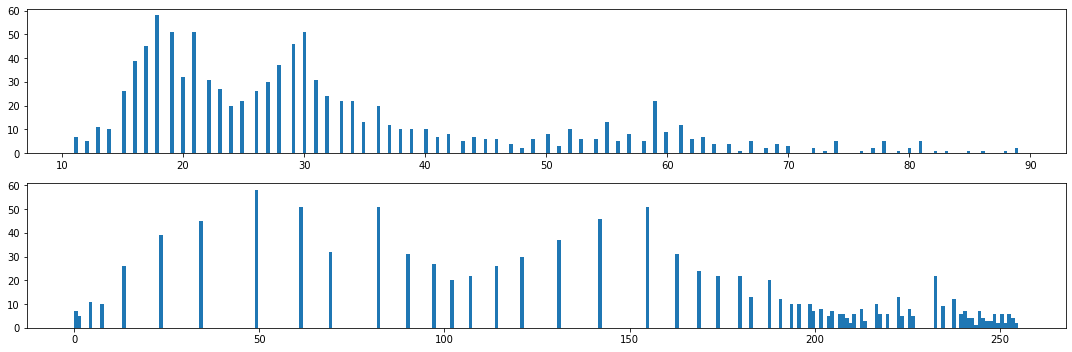

In [ ]:
def equalize(image):
    image = cv2.equalizeHist(image)
    return image

img_equ = equalize(img)

plt.figure(figsize = (15,5))

plt.subplot(211)
plt.hist(img.ravel(),bins = 256)

plt.subplot(212)
plt.hist(img_equ.ravel(),bins = 256)

plt.tight_layout()
plt.show()

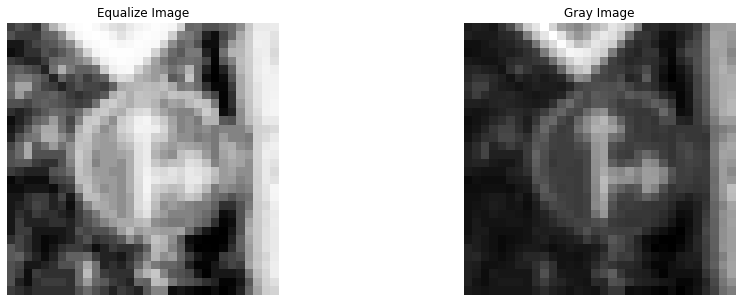

In [ ]:
plt.figure(figsize = (15,5))

plt.subplot(121)
plt.imshow(img_equ,cmap = "gray")
plt.axis("off")
plt.title("Equalize Image")

plt.subplot(122)
plt.imshow(img,cmap = "gray")
plt.axis("off")
plt.title("Gray Image")

plt.show()

In [ ]:
def preprocessing(image):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.equalizeHist(image)
    image = image/255

    return image

In [ ]:
# Example
def square(a):
    return a*a

list(map(lambda x : x * x,[1,2,3])),list(map(square,[2,3,4]))

([1, 4, 9], [4, 9, 16])

In [ ]:
X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_val = np.array(list(map(preprocessing, X_val)))

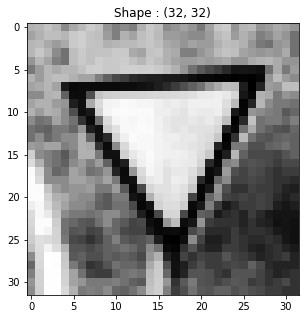

In [ ]:
random = np.random.randint(0,len(X_train)-1)
plt.figure(figsize = (7,5))
plt.imshow(X_train[random],cmap = "gray")
plt.title(f"Shape : {X_train[random].shape}")
plt.show()

In [ ]:
X_train.shape,X_val.shape,X_test.shape

((34799, 32, 32), (4410, 32, 32), (12630, 32, 32))

In [ ]:
X_train = X_train.reshape( (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) ) 
X_test = X_test.reshape( (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1) ) 
X_val = X_val.reshape( (X_val.shape[0], X_val.shape[1], X_val.shape[2], 1) ) 

X_train.shape,X_val.shape,X_test.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 43)
y_test = tf.keras.utils.to_categorical(y_test, 43)
y_val = tf.keras.utils.to_categorical(y_val, 43)

In [ ]:
def leNet_model():

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters = 30, kernel_size = (5,5) , input_shape = (32,32,1) , activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

    model.add(tf.keras.layers.Conv2D(filters = 15, kernel_size = (3,3) , activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 500 , activation = "relu" ))
    model.add(tf.keras.layers.Dropout(rate = 0.5))
    model.add(tf.keras.layers.Dense(units = num_classes, activation = "softmax"))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01), metrics = ["accuracy"], loss = "categorical_crossentropy") 

    return model

In [ ]:
model = leNet_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 30)        780       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 15)        4065      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 15)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 540)               0         
                                                                 
 dense (Dense)               (None, 500)               2

In [ ]:
h = model.fit(X_train, y_train, epochs = 10,validation_data = (X_val,y_val), batch_size = 400,verbose = 1, shuffle = 1)

Epoch 1/10
87/87 [==============================] - 8s 39ms/step - loss: 2.2962 - accuracy: 0.3581 - val_loss: 0.8642 - val_accuracy: 0.7435
Epoch 2/10
87/87 [==============================] - 3s 30ms/step - loss: 0.6852 - accuracy: 0.7779 - val_loss: 0.5251 - val_accuracy: 0.8456
Epoch 3/10
87/87 [==============================] - 2s 28ms/step - loss: 0.4283 - accuracy: 0.8571 - val_loss: 0.4275 - val_accuracy: 0.8687
Epoch 4/10
87/87 [==============================] - 2s 26ms/step - loss: 0.3241 - accuracy: 0.8948 - val_loss: 0.3571 - val_accuracy: 0.8948
Epoch 5/10
87/87 [==============================] - 2s 26ms/step - loss: 0.2732 - accuracy: 0.9096 - val_loss: 0.3500 - val_accuracy: 0.8905
Epoch 6/10
87/87 [==============================] - 2s 24ms/step - loss: 0.2322 - accuracy: 0.9241 - val_loss: 0.3495 - val_accuracy: 0.9023
Epoch 7/10
87/87 [==============================] - 2s 24ms/step - loss: 0.2153 - accuracy: 0.9278 - val_loss: 0.3722 - val_accuracy: 0.8921
Epoch 8/10
87

In [ ]:
def history_graph(history, epochs ):

    plt.figure(figsize = (15,5))

    plt.subplot(121)
    plt.plot(history.history["accuracy"], label = "Train")
    plt.plot(history.history["val_accuracy"], label = "Validation")
    plt.xticks(range(0,epochs+1,2))
    plt.title("Accuracy Score",fontsize = 15)
    plt.xlabel("Epochs ")
    plt.ylabel("Score")
    plt.legend(loc = "best")

    plt.subplot(122)
    plt.plot(history.history["loss"], label = "Train")
    plt.plot(history.history["val_loss"], label = "Validation")
    plt.xticks(range(0,epochs+1,2))
    plt.title("Loss Score",fontsize = 15)
    plt.xlabel("Epochs ")
    plt.ylabel("Score")
    plt.legend(loc = "best")

    plt.tight_layout()
    plt.show()

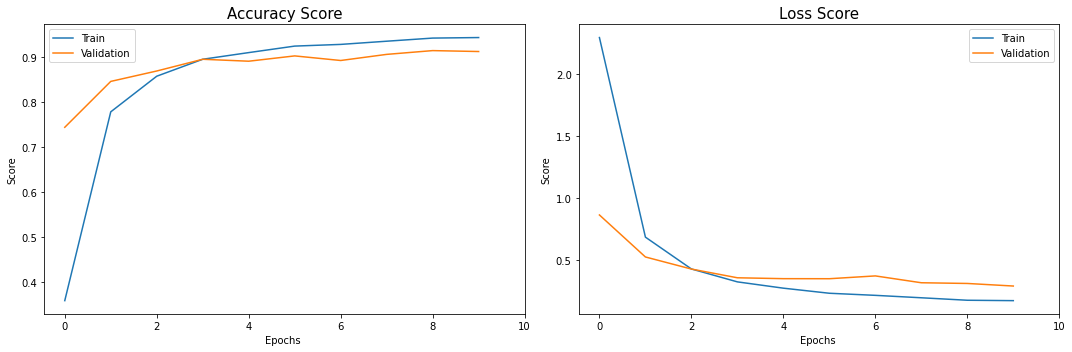

In [ ]:
history_graph(h, 10)

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Loss : ", score[0])
print("Accuracy : ", score[1])

Loss :  0.380733847618103
Accuracy :  0.9052256345748901


--

In [ ]:
def Rebuild_leNet_model():

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters = 60 , kernel_size = (5,5) , input_shape = (32,32,1) , activation="relu"))
    model.add(tf.keras.layers.Conv2D(filters = 60 , kernel_size = (5,5) , activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

    model.add(tf.keras.layers.Conv2D(filters = 30 , kernel_size = (3,3) , activation="relu"))
    model.add(tf.keras.layers.Conv2D(filters = 30 , kernel_size = (3,3) , activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    model.add(tf.keras.layers.Dropout(rate = 0.5))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 500 , activation = "relu" ))
    model.add(tf.keras.layers.Dropout(rate = 0.5))
    model.add(tf.keras.layers.Dense(units = num_classes, activation = "softmax"))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ["accuracy"], loss = "categorical_crossentropy") 

    return model

In [ ]:
model = Rebuild_leNet_model()

In [ ]:
h = model.fit(X_train, y_train, epochs = 10,validation_data = (X_val,y_val), batch_size = 400,verbose = 0, shuffle = 1)

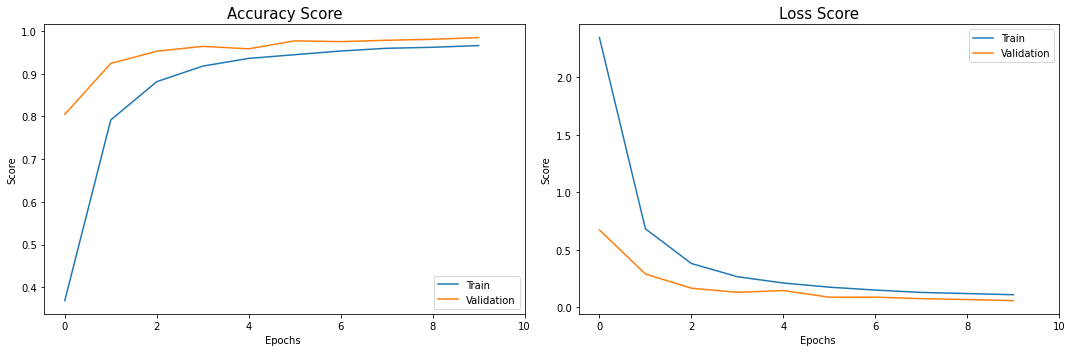

In [ ]:
history_graph(h,10)

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)

#Loss :  0.380733847618103
#Accuracy :  0.9052256345748901

print("Loss : ", score[0])
print("Accuracy : ", score[1])

Loss :  0.1349635124206543
Accuracy :  0.9637371301651001


https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg

https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg

https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg

https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg

https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg

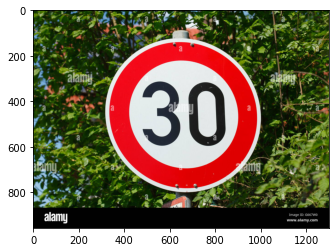

In [ ]:
import requests
from PIL import Image
url = "https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg"
r = requests.get(url, stream = True)
img = Image.open(r.raw)

plt.imshow(img)
plt.show()

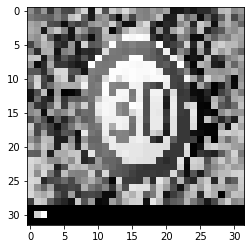

In [ ]:
img = np.asarray(img)
img = cv2.resize(img, (32,32))
img = preprocessing(img)

plt.imshow(img,cmap = plt.get_cmap("gray"))
plt.show()

In [ ]:
img = img.reshape((1,32,32,1))
img.shape

(1, 32, 32, 1)

In [ ]:
pred = (np.argmax(model.predict(img)))
print("Prediction : ", pred)

Prediction :  1


In [ ]:
df[df["ClassId"] == pred]["SignName"].values[0]

'Speed limit (30km/h)'

--

In [ ]:
X_train, y_train = train_data["features"], train_data["labels"]
X_val ,y_val = val_data["features"], val_data["labels"]
X_test, y_test = test_data["features"], test_data["labels"]

In [ ]:
def preprocessing(image):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.equalizeHist(image)
    image = image/255

    return image

In [ ]:
X_train = np.array(list(map(preprocessing, X_train)))
X_test = np.array(list(map(preprocessing, X_test)))
X_val = np.array(list(map(preprocessing, X_val)))

In [ ]:
X_train = X_train.reshape( (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) ) 
X_test = X_test.reshape( (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1) ) 
X_val = X_val.reshape( (X_val.shape[0], X_val.shape[1], X_val.shape[2], 1) ) 

X_train.shape,X_val.shape,X_test.shape

((34799, 32, 32, 1), (4410, 32, 32, 1), (12630, 32, 32, 1))

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 43)
y_test = tf.keras.utils.to_categorical(y_test, 43)
y_val = tf.keras.utils.to_categorical(y_val, 43)

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1,
                                                          height_shift_range = 0.1,
                                                          zoom_range = 0.2,
                                                          shear_range = 0.2,
                                                          rotation_range = 10)

In [ ]:
datagen.fit(X_train)

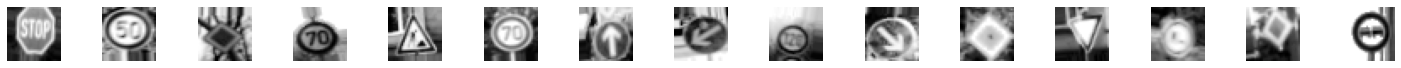

In [ ]:
batches = datagen.flow(X_train,y_train,batch_size = 20)
X_batch, y_bacth = next(batches)

fig, axs = plt.subplots(1,15,figsize = (20,5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape((32,32)), cmap = "gray")
    axs[i].axis("off")

plt.show()

In [ ]:
model = Rebuild_leNet_model()

In [ ]:
h = model.fit_generator(datagen.flow(X_train,y_train , batch_size = 50), steps_per_epoch = X_train.shape[0]/50, epochs = 10, validation_data = (X_val, y_val), shuffle = 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
695/695 [==============================] - 25s 34ms/step - loss: 2.0558 - accuracy: 0.4179 - val_loss: 0.5282 - val_accuracy: 0.8435
Epoch 2/10
695/695 [==============================] - 23s 33ms/step - loss: 0.8125 - accuracy: 0.7463 - val_loss: 0.1636 - val_accuracy: 0.9506
Epoch 3/10
695/695 [==============================] - 24s 34ms/step - loss: 0.5552 - accuracy: 0.8269 - val_loss: 0.1062 - val_accuracy: 0.9651
Epoch 4/10
695/695 [==============================] - 29s 41ms/step - loss: 0.4336 - accuracy: 0.8613 - val_loss: 0.0776 - val_accuracy: 0.9755
Epoch 5/10
695/695 [==============================] - 23s 32ms/step - loss: 0.3541 - accuracy: 0.8899 - val_loss: 0.1068 - val_accuracy: 0.9649
Epoch 6/10
695/695 [==============================] - 23s 33ms/step - loss: 0.3215 - accuracy: 0.8993 - val_loss: 0.0444 - val_accuracy: 0.9873
Epoch 7/10
695/695 [==============================] - 23s 33ms/step - loss: 0.2829 - accuracy: 0.9125 - val_loss: 0.0582 - val_accuracy:

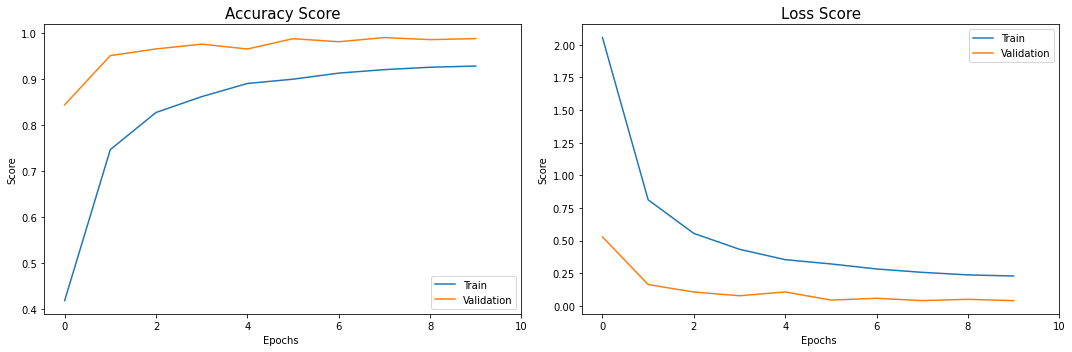

In [ ]:
history_graph(h, 10)

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Loss : ", score[0])
print("Accuracy : ", score[1])

Loss :  0.1077895537018776
Accuracy :  0.9686461091041565


--

In [ ]:
def Rebuild_leNet_model_v1():

    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Conv2D(filters = 60 , kernel_size = (5,5) , input_shape = (32,32,1) , activation="relu"))
    model.add(tf.keras.layers.Conv2D(filters = 60 , kernel_size = (5,5) , activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

    model.add(tf.keras.layers.Conv2D(filters = 30 , kernel_size = (3,3) , activation="relu"))
    model.add(tf.keras.layers.Conv2D(filters = 30 , kernel_size = (3,3) , activation="relu"))
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
    #model.add(tf.keras.layers.Dropout(rate = 0.5))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 500 , activation = "relu" ))
    model.add(tf.keras.layers.Dropout(rate = 0.5))
    model.add(tf.keras.layers.Dense(units = num_classes, activation = "softmax"))

    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ["accuracy"], loss = "categorical_crossentropy") 

    return model

In [ ]:
model = Rebuild_leNet_model_v1()

In [ ]:
h = model.fit_generator(datagen.flow(X_train,y_train , batch_size = 50), steps_per_epoch = X_train.shape[0]/50, epochs = 10, validation_data = (X_val, y_val), shuffle = 1,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
695/695 [==============================] - 24s 34ms/step - loss: 1.6196 - accuracy: 0.5400 - val_loss: 0.3007 - val_accuracy: 0.9113
Epoch 2/10
695/695 [==============================] - 23s 33ms/step - loss: 0.5220 - accuracy: 0.8384 - val_loss: 0.1221 - val_accuracy: 0.9637
Epoch 3/10
695/695 [==============================] - 23s 33ms/step - loss: 0.3303 - accuracy: 0.8974 - val_loss: 0.0858 - val_accuracy: 0.9762
Epoch 4/10
695/695 [==============================] - 23s 33ms/step - loss: 0.2432 - accuracy: 0.9249 - val_loss: 0.0916 - val_accuracy: 0.9751
Epoch 5/10
695/695 [==============================] - 24s 35ms/step - loss: 0.2063 - accuracy: 0.9347 - val_loss: 0.0779 - val_accuracy: 0.9800
Epoch 6/10
695/695 [==============================] - 23s 33ms/step - loss: 0.1722 - accuracy: 0.9455 - val_loss: 0.0483 - val_accuracy: 0.9866
Epoch 7/10
695/695 [==============================] - 23s 33ms/step - loss: 0.1595 - accuracy: 0.9501 - val_loss: 0.0408 - val_accuracy:

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 0)

print("Loss : ", score[0])
print("Accuracy : ", score[1])

Loss :  0.1012222096323967
Accuracy :  0.9735550284385681


Prediction :  1


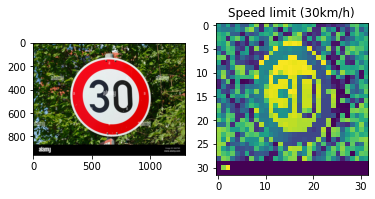

Prediction :  34


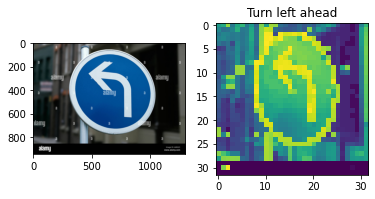

Prediction :  23


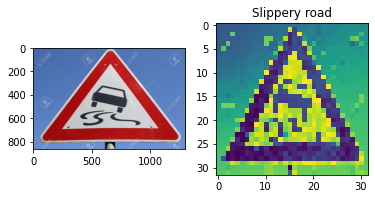

Prediction :  13


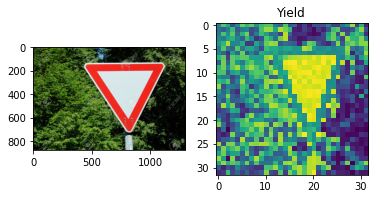

Prediction :  24


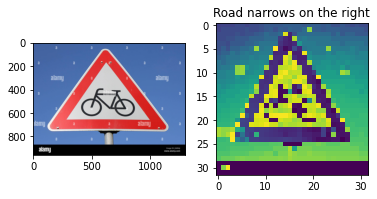

Prediction :  1


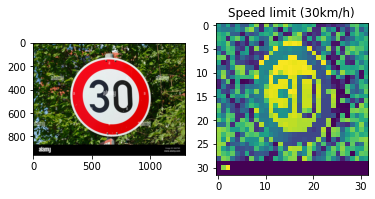

In [ ]:
import requests
from PIL import Image

liste = ["https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg",

"https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg",

"https://previews.123rf.com/images/bwylezich/bwylezich1608/bwylezich160800375/64914157-german-road-sign-slippery-road.jpg",

"https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg",

"https://c8.alamy.com/comp/J2MRAJ/german-road-sign-bicycles-crossing-J2MRAJ.jpg",

"https://c8.alamy.com/comp/G667W0/road-sign-speed-limit-30-kmh-zone-passau-bavaria-germany-G667W0.jpg"]

for url in liste:
    r = requests.get(url, stream = True)

    img = Image.open(r.raw)

    plt.subplot(121)
    plt.imshow(img)

    img = np.asarray(img)
    img = cv2.resize(img, (32,32))
    img = preprocessing(img)

    plt.subplot(122)
    plt.imshow(img)

    img = img.reshape((1,32,32,1))

    pred = (np.argmax(model.predict(img)))
    print("Prediction : ", pred)

    name = df[df["ClassId"] == pred]["SignName"].values[0]

    plt.title(name)
    plt.show()